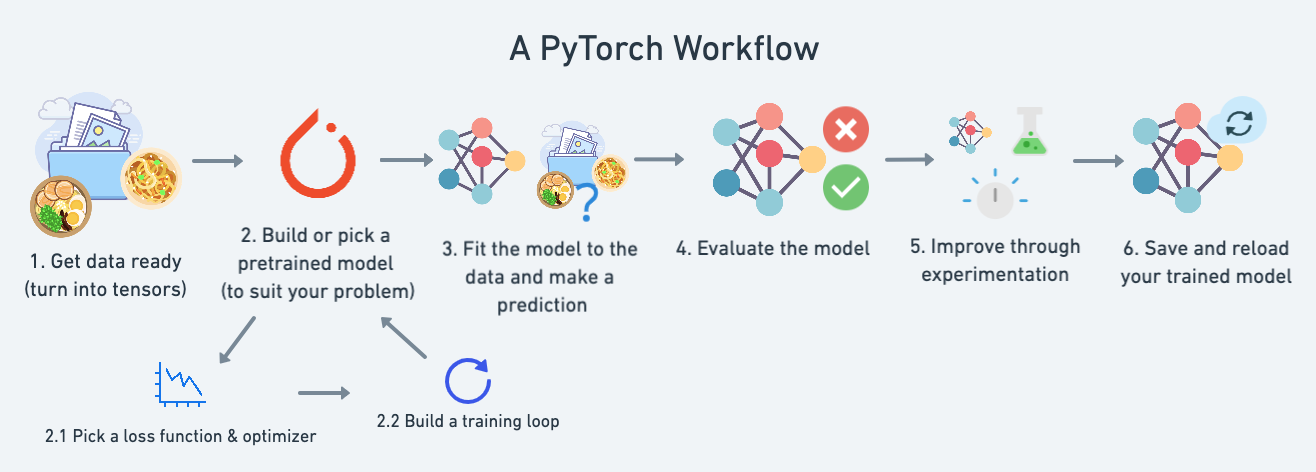

#PyTorch Workflow

In [239]:
what_we_are_covering = {1:'data(prepare and load)',
                        2:'build model',
                        3:'fitting the model to data(training)',
                        4:'making the predictions and evaluating the model',
                        5:'saving and loading a model',
                        6:'putting it all together'}

what_we_are_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making the predictions and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [240]:
import torch
from torch import nn       #contains all of the PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#data preparing and loading

data can be of forms:
* excel sheet
* images of any kind
* videos
* audio
* DNA
* text

#machine learning/ deep learning can be of two forms:
* get data into a numerical representation
* build a model to learn patterns


we will use the linear regression formula to make a straight line with known parameters.

Linear Regression = a + b * x


In [241]:
# create known parameters
weight = 0.7  #b
bias = 0.3    #a

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [242]:
len(X) , len(y)

(50, 50)

# splitting data into training and testing sets -->train , validate , test

In [243]:
#create a train/test split
train_split = int(0.8 * len(X))
train_split

X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [244]:
X_train , y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

#visualise the data

In [245]:
def plot_predictions(train_data = X_train ,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))

  #plotting training data in blue
  plt.scatter(train_data , train_labels , c='b' , s=4 , label = 'Training data')

  #plotting testing data in green
  plt.scatter(test_data , test_labels , c='g' , s=4 , label = 'Testing data')

  #are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data , predictions , c='r' , s=4 , label = 'Predictions')

  #show the legend
  plt.legend(prop = {'size':14})

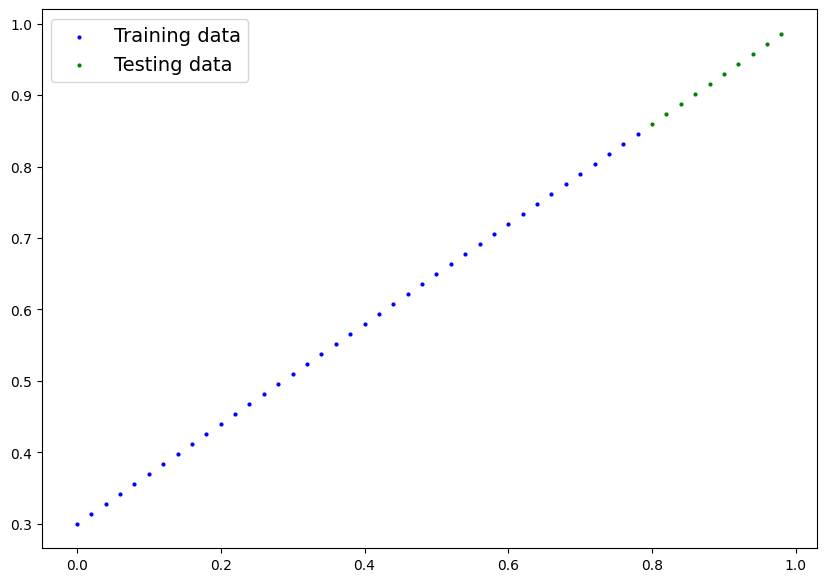

In [246]:
plot_predictions()

#building the PyTorch model - linear regression


In [247]:
class LinearRegressionModel(nn.Module):  #nn.module is the subclass
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,   #start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  #forward method to define the computation in the model
  def forward(self , x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


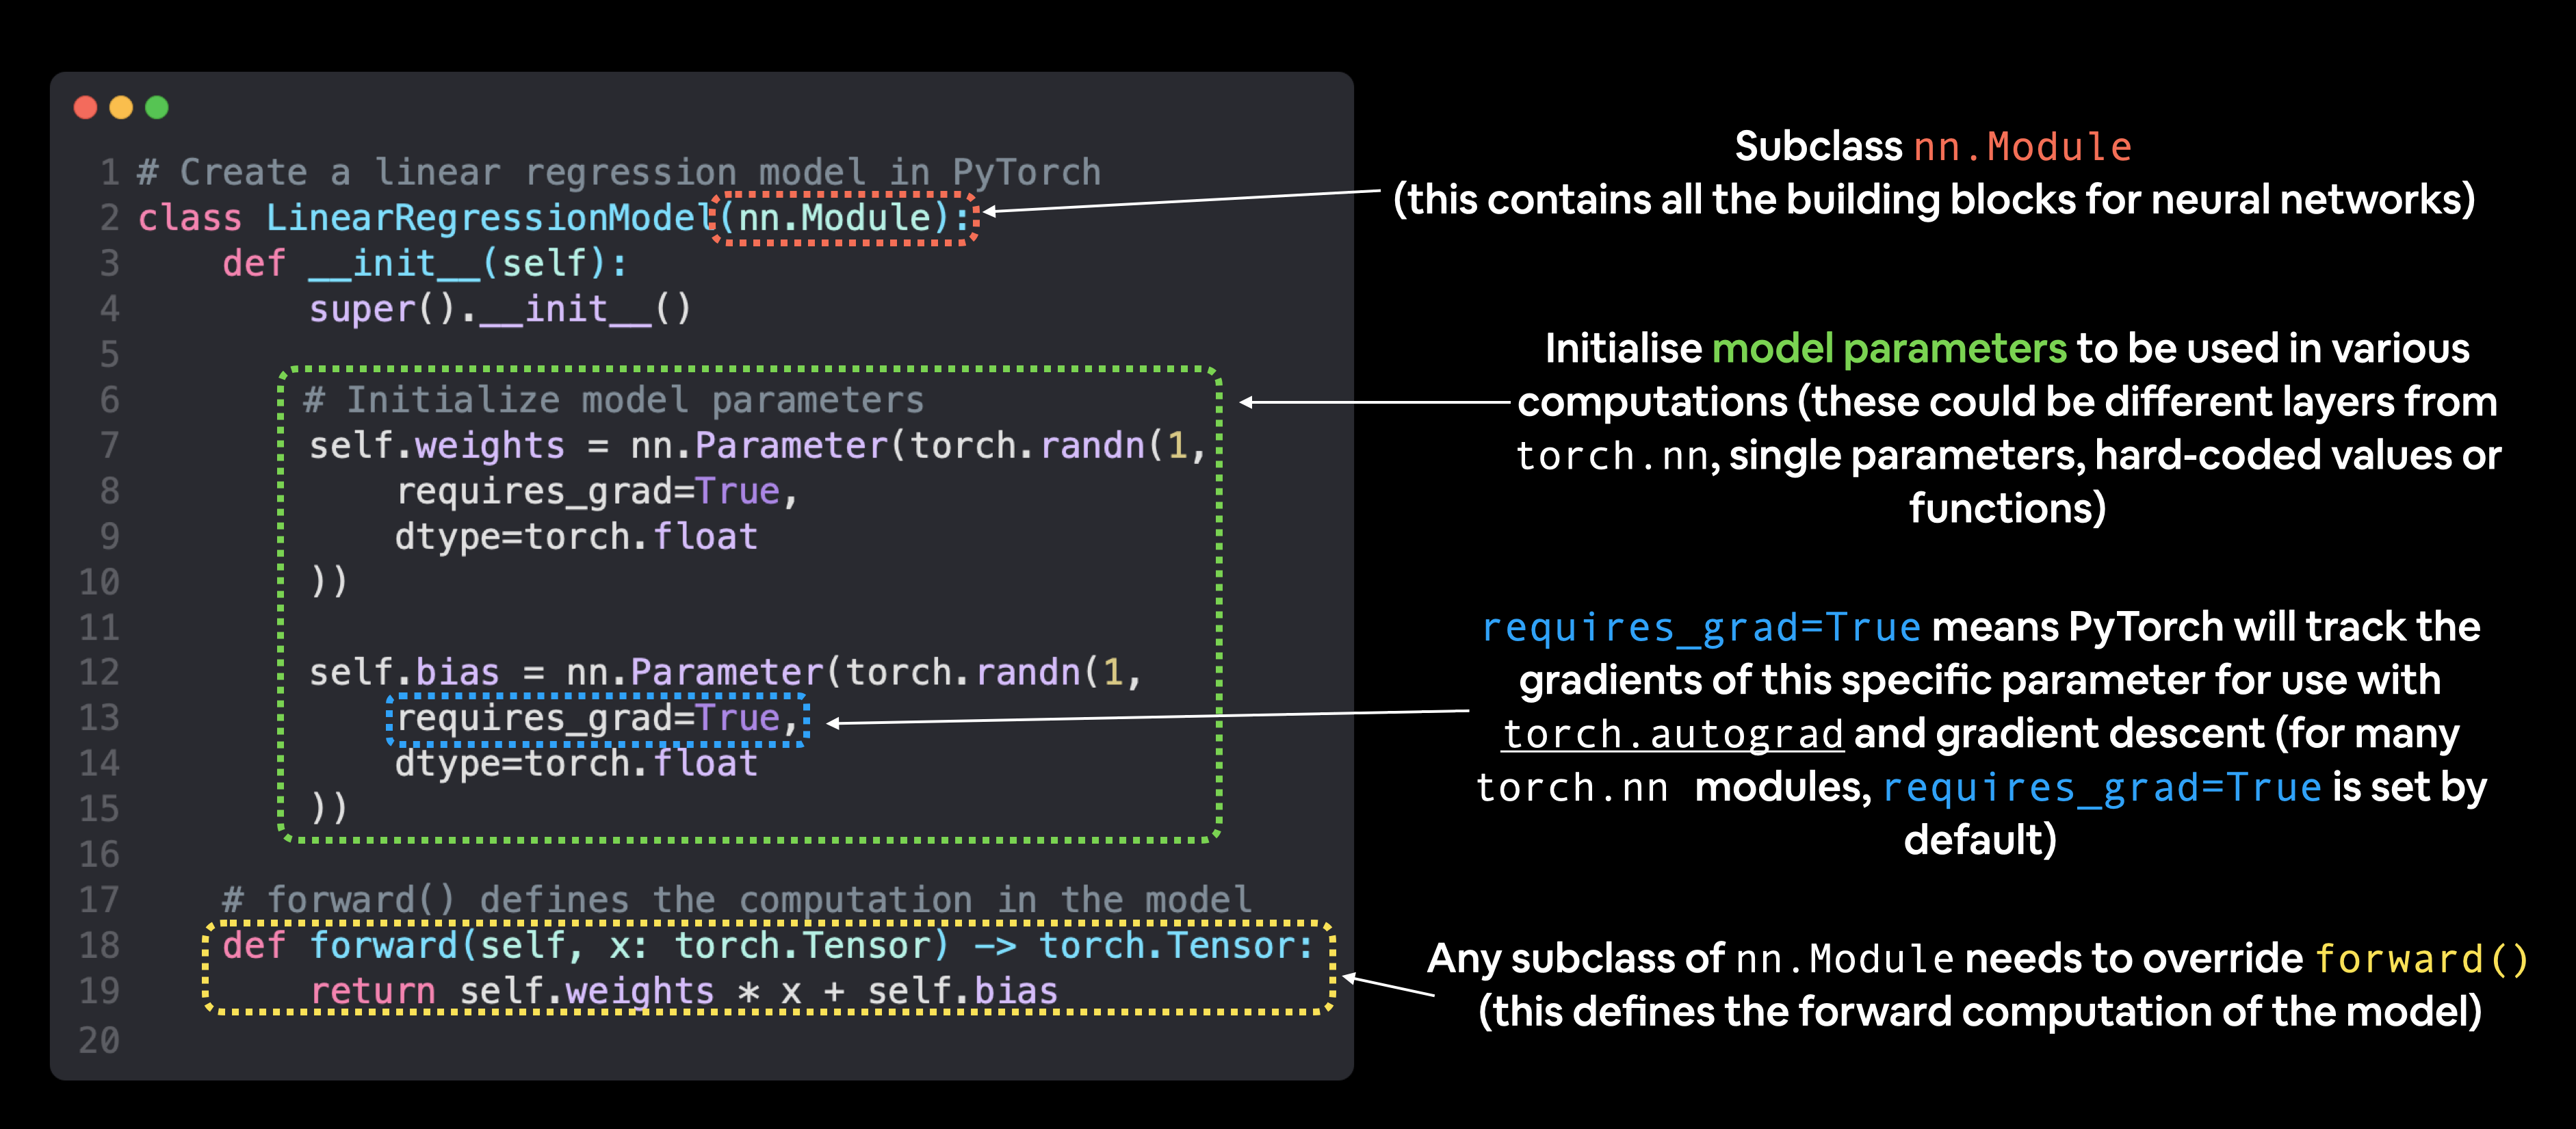

#what the model does:
* start with random values (weights and biases)
* look at training data and adjust the random values to betterr represent the ideal values

#how does it work?
It works through two main algorithms:
* gradient descent
* back propagation

#Pytorch model building essentials:

* torch.nn --> contains all the buildings for the computational graphs(a neural network can be considered a computational graph)
* torch.nn.Parameter --> what parameters should our model try and learn
* torch.nn.Module --> The base class for all neural network module , if you subclass it, you should overwrite forward()
* torch.Optim --> this is where the optimizers in PyTorch live, they will help with the Gradient Descent
* def forward() --> all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.
* torch.utils.data.Dataset --> represents a map between key(label) and sample(feature) pairs of your data,such as images and their associated labels.
* torch.utils.data.DataLoader --> creates a Python iterable over a torch dataset or allows you to iterate over your data.

# checking the contents of our PyTorch model

In [248]:
import torch
#create a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [249]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

this means that we initialise our model with random parameters

In [250]:
#list the named parameters

model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

this is the current prediction that the model makes

In [251]:
weight, bias

(0.7, 0.3)

these are the ideal values.

the entire of deep learning is to start with random numbers and to progress those near more ideal numbers

making the predictions using torch.inference_mode()

to see how well it predicts y_test based on x_test.
when we pass data through our model, its going to run through the forward() method.

In [252]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [253]:
with torch.inference_mode():   #this one is lacking the grad function, inference mode turns off the gradient descent
  y_preds = model_0(X_test)    #helps for faster processing for large datasets

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [254]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

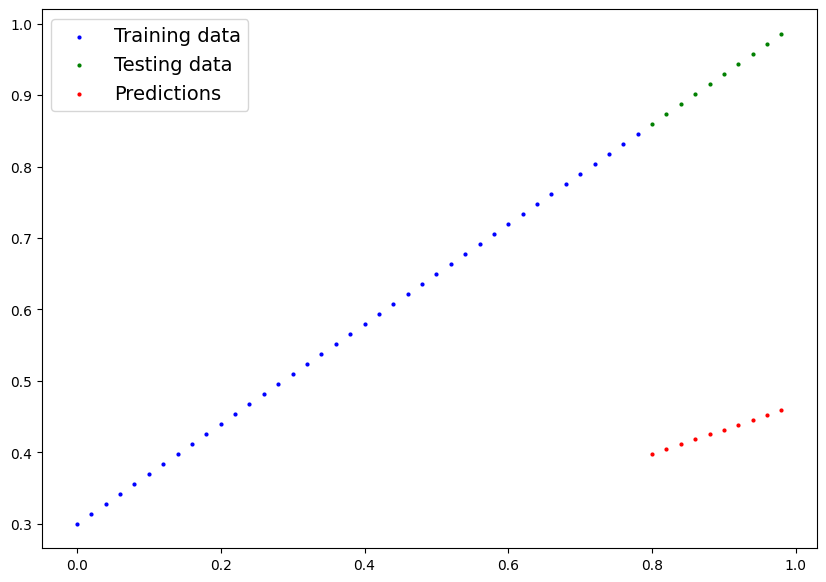

In [255]:
plot_predictions(predictions=y_preds)

In [256]:
with torch.no_grad():    #alternative of inference mode, however inference mode is preferred
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

an ideal model will replicate the known parameters

#Training a model with PyTorch - The whole idea of training is to move the model from unknown parameters to known parameters

One way to measure how poor or how wrong your models predictions are is to use a Loss Function
Note: loss function may also be called Cost function or Criterion.

#Things we need to train:

* Loss Function: A function to measure how wrong ypur models predictions are to the ideal model.
* Optimizer: Takes into account the loss of a model and adjusts the  models parameters to improve the loss function.

#for PyTorch, we need:
* a training loop
* a testing loop

In [257]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [258]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

we are using MAE

MAE_Loss = torch.mean(torch.abs(y_pred - y_test))

or

MAE_Loss = torch.nn.L1Loss()

In [259]:
#loss fn and optimizers work together
#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01
                           )



large lr values can result in large changes and vice versa

In [260]:
loss_fn

L1Loss()

#building a training loop and a testing loop in PyTorch

we need in a training loop:
* loop through the data and do...
* forward pass or forward propagation to make predictions
* calculate the loss - compare the forward pass predictions
* optimize the zero grad
* loss backward - move backward with respect of the loss
* optimizer step
* improve the loss



In [261]:
with torch.no_grad():
  list(model_0.parameters())

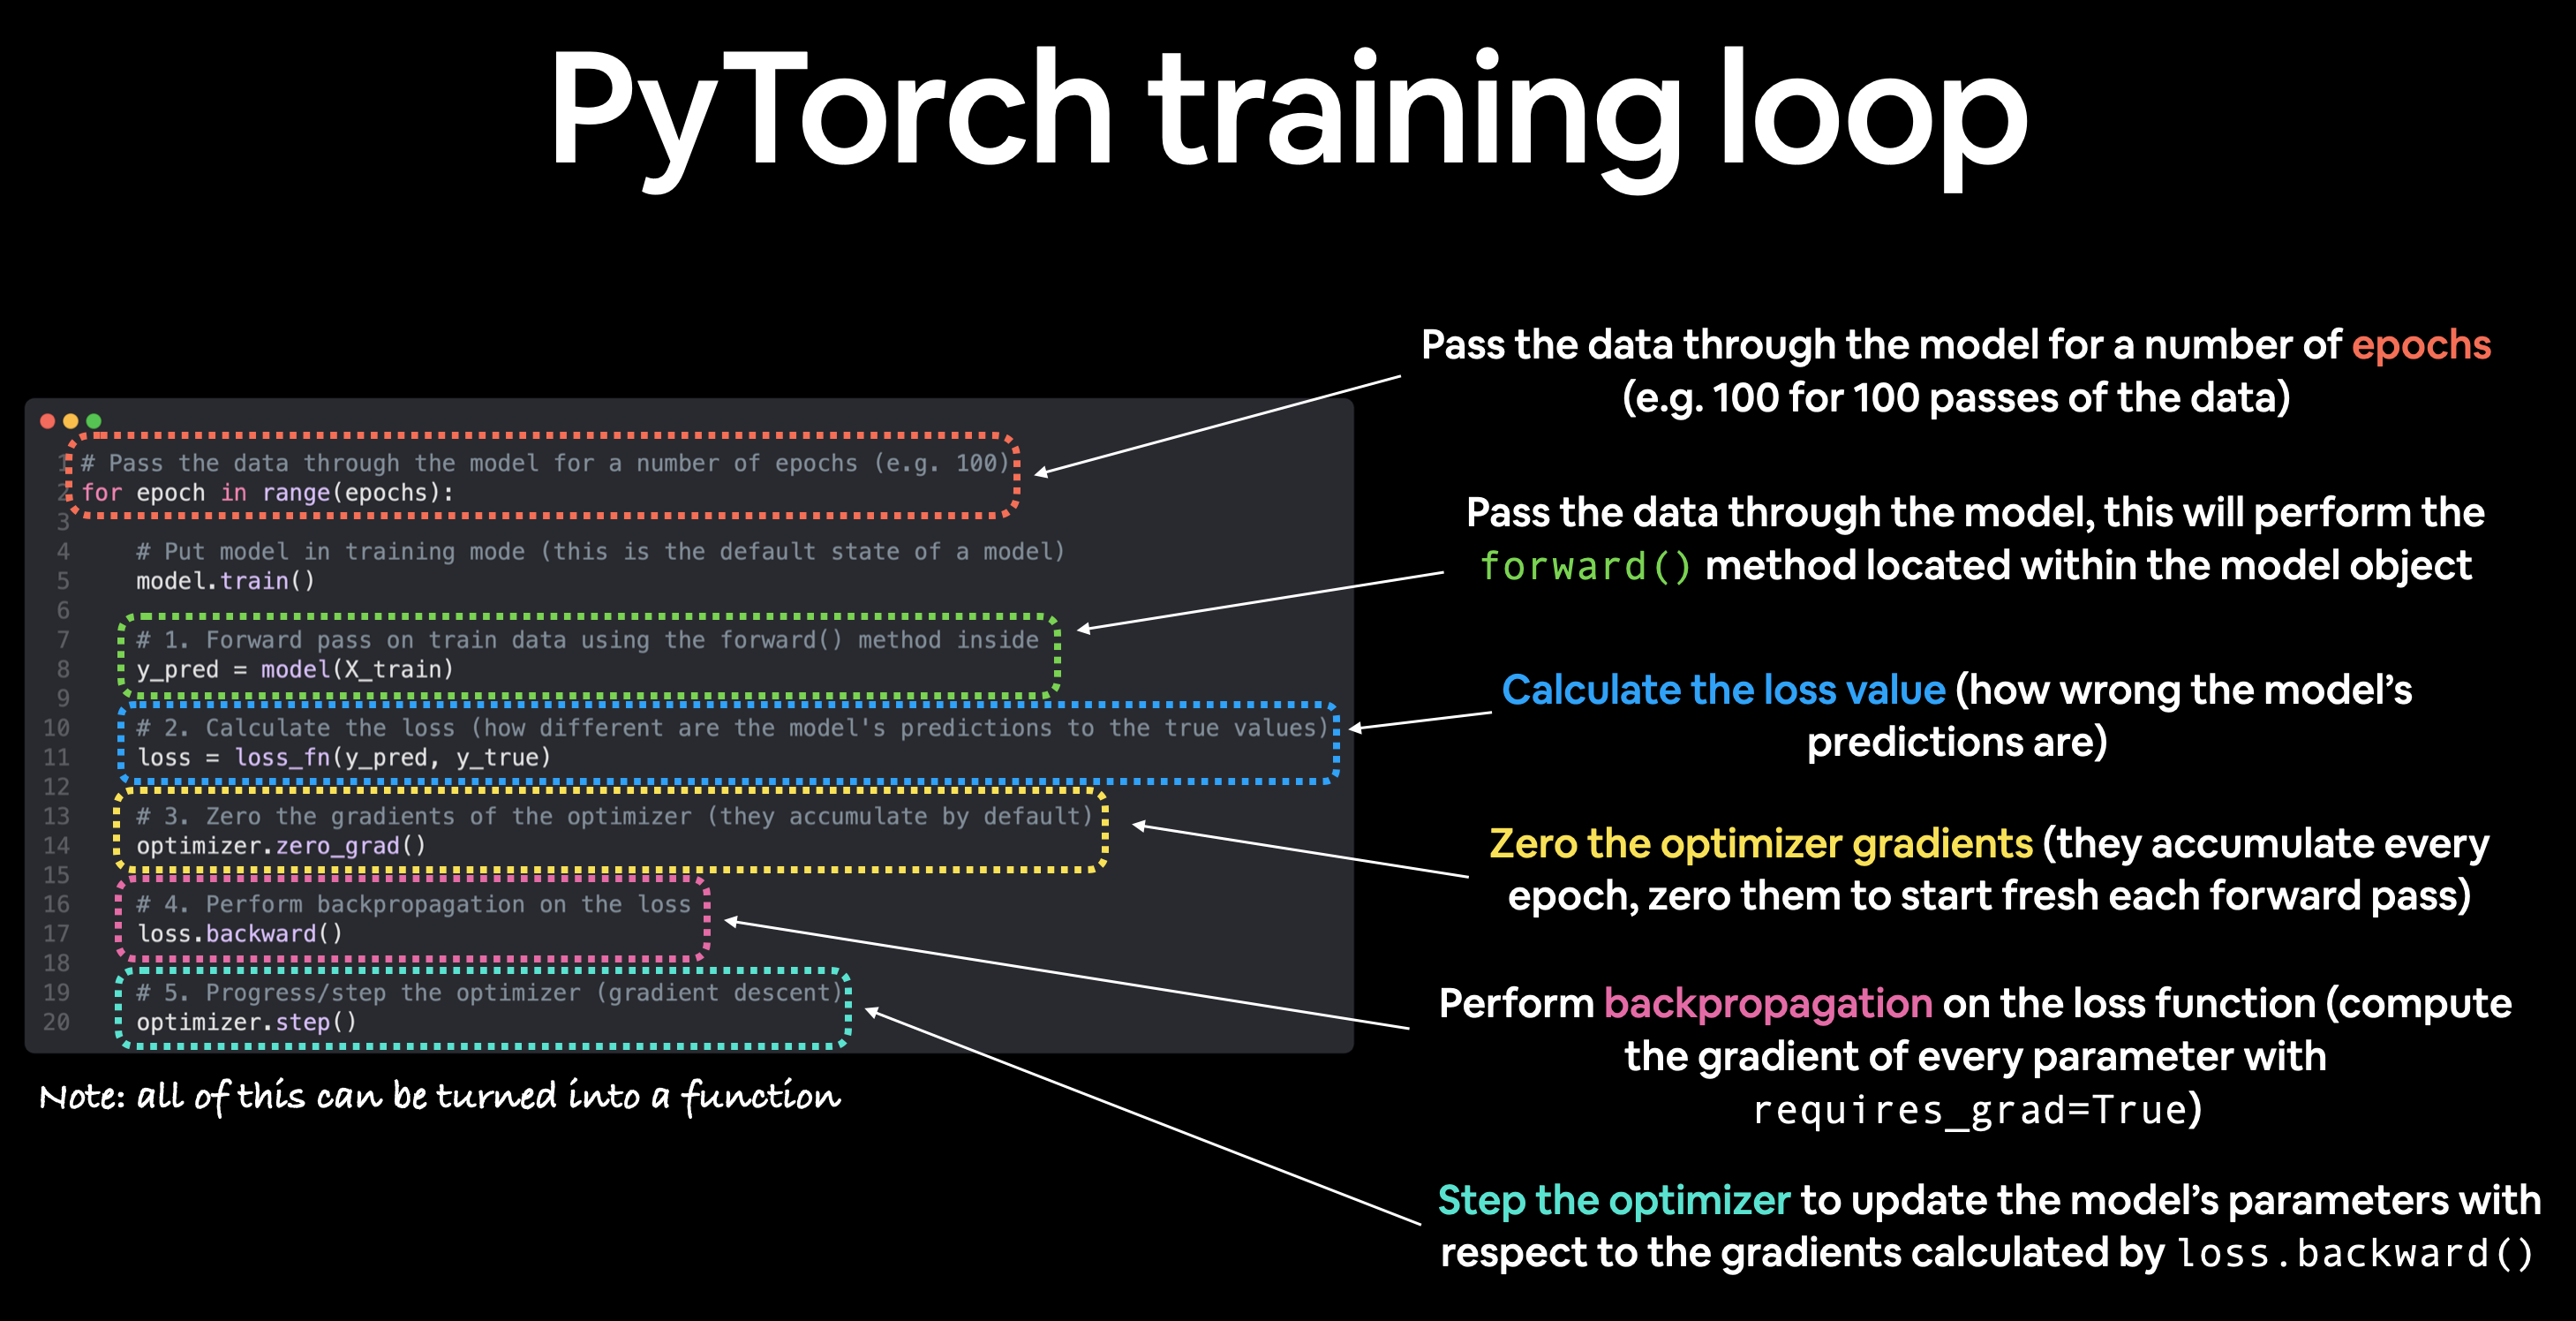

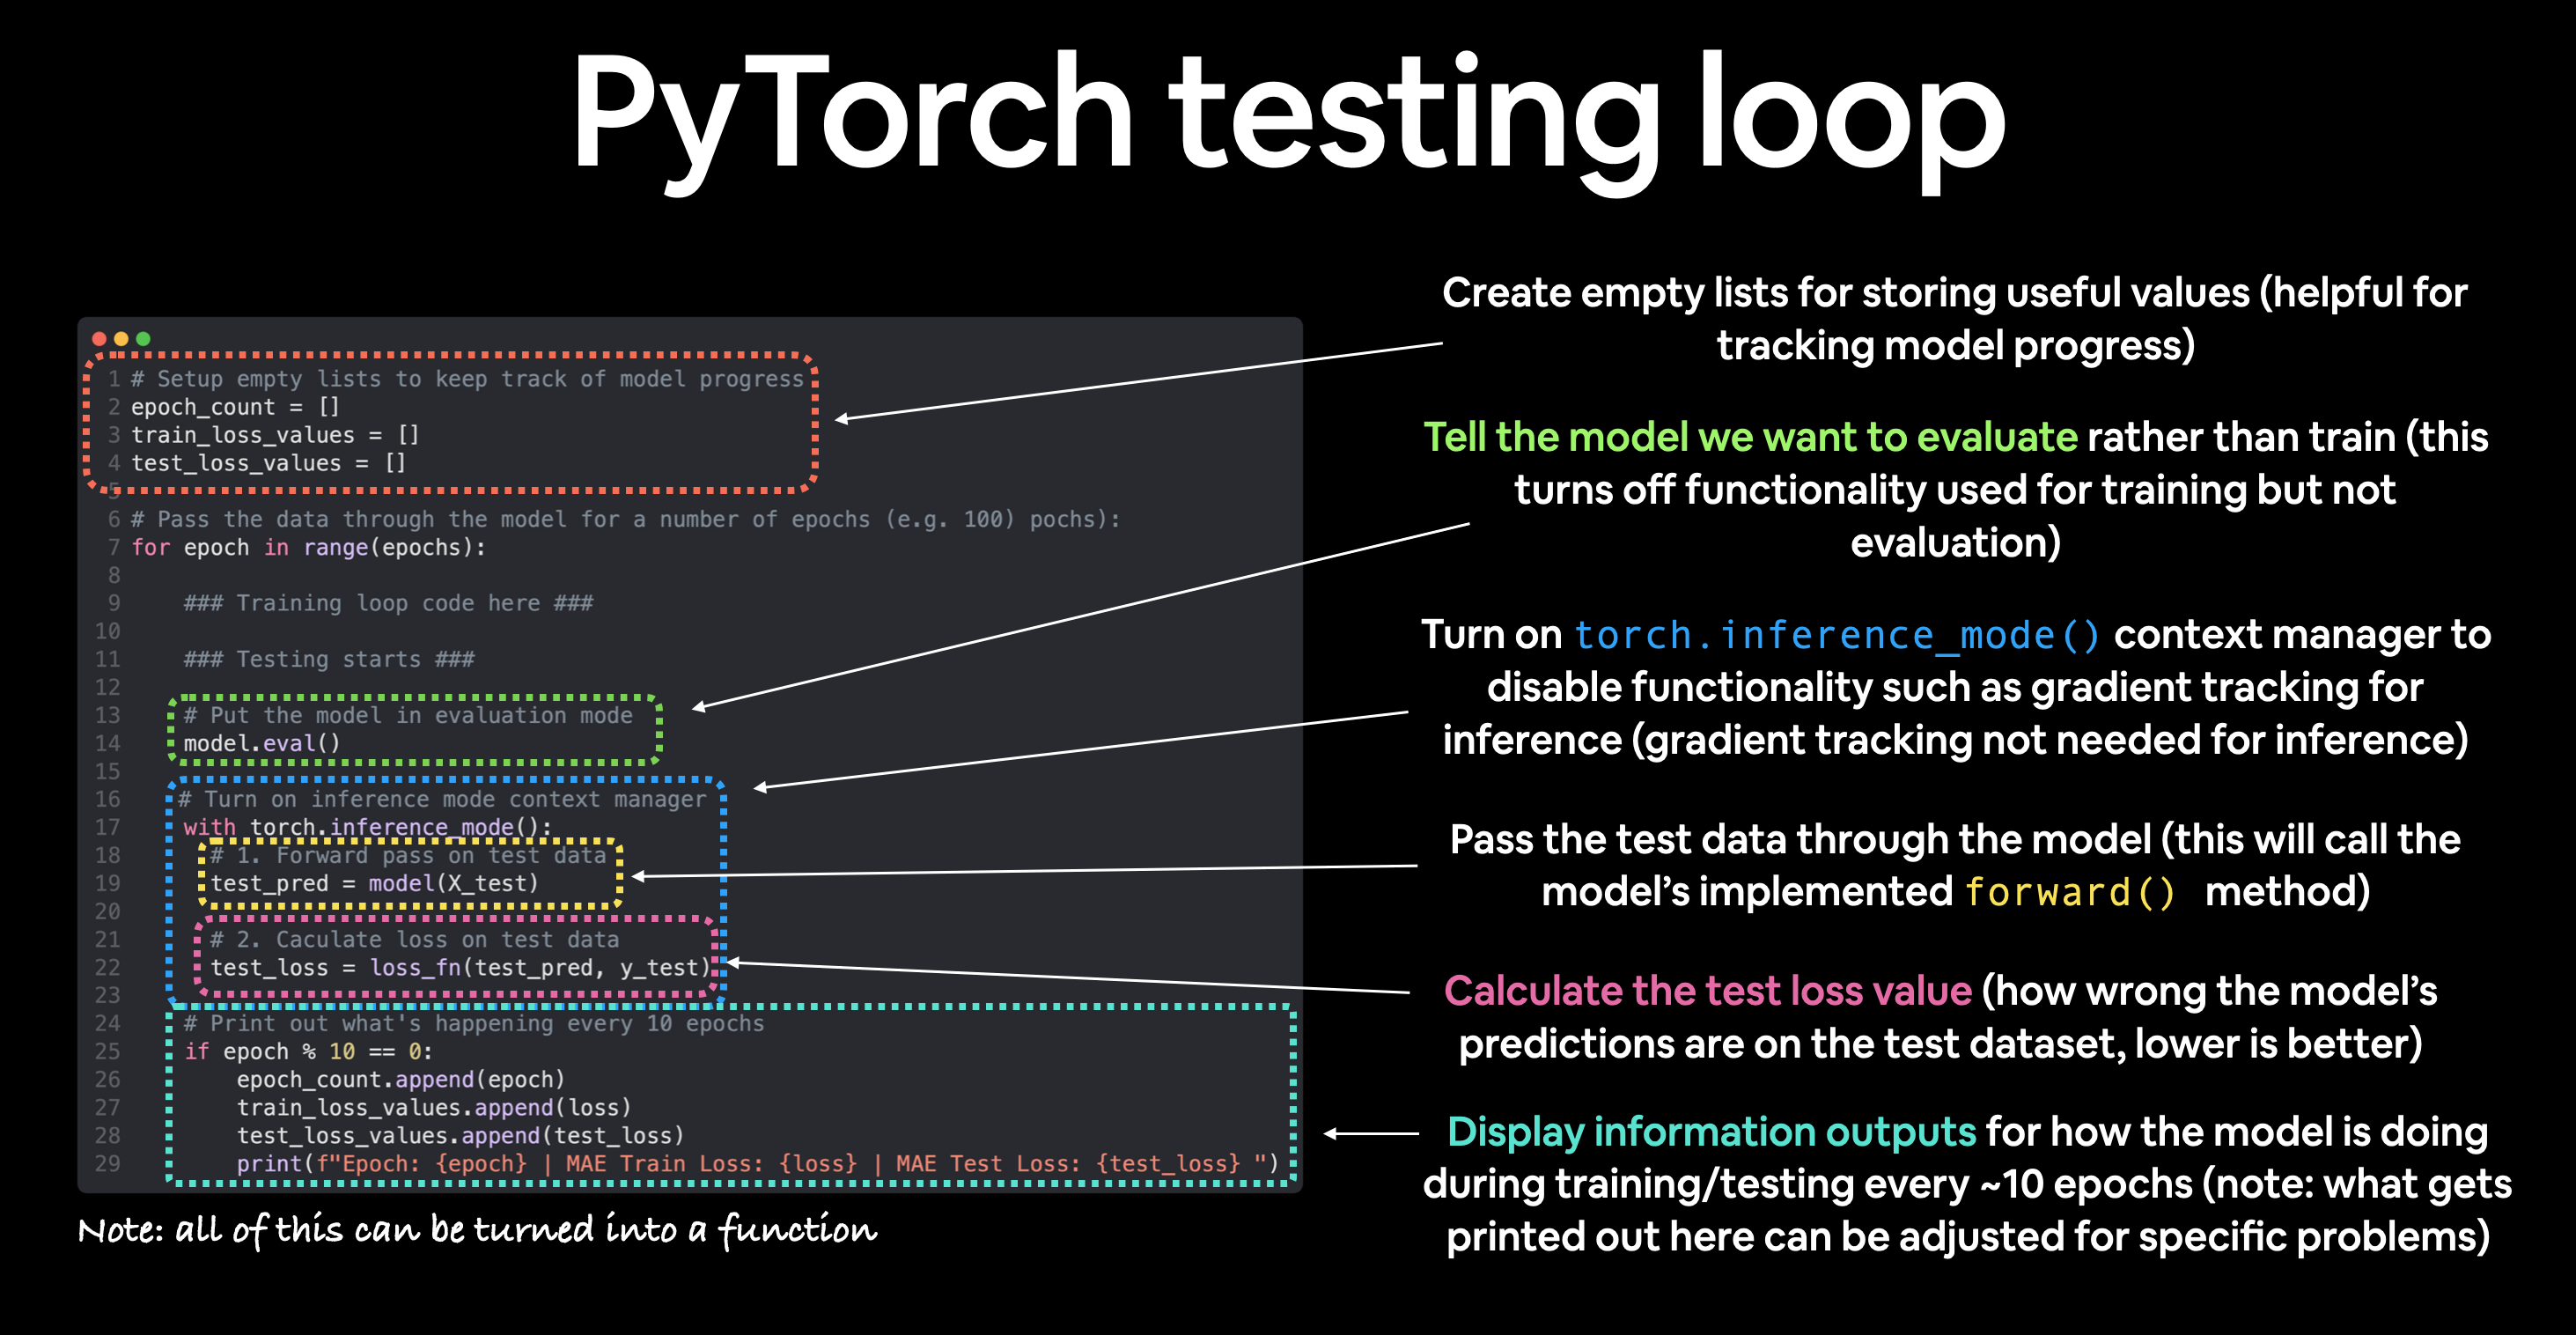

In [262]:
torch.manual_seed(42)

epochs = 200 #one loop through the data, this is a hyperparameters

#track different values
epoch_count = []
loss_values = []
test_loss_values = []


##Training

# loop through the data
for epoch in range(epochs):
  #set the model to the training mode
  model_0.train() #train mode in PyTorch sets all parameters that requires a gradient to require gradient

  #1. forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred , y_train)
  #print(f'Loss: {loss}')

  #3. optimize the zero grad
  optimizer.zero_grad()       #to prevent the Accumulation of Gradients

  #4. perform backpropagation on the loss with respect to parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step()

  ##Testing
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #turns off gradient tracking and a couple of more things
  #can also use with torch.no_grad()

    #1. do the forward pass in testing mode
    test_pred = model_0(X_test)

    #2. calculate the loss of data it has never seen before
    test_loss = loss_fn(test_pred , y_test)

  #print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

    #print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

#making predictions


In [263]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [264]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [265]:
#ideal
weight, bias

(0.7, 0.3)

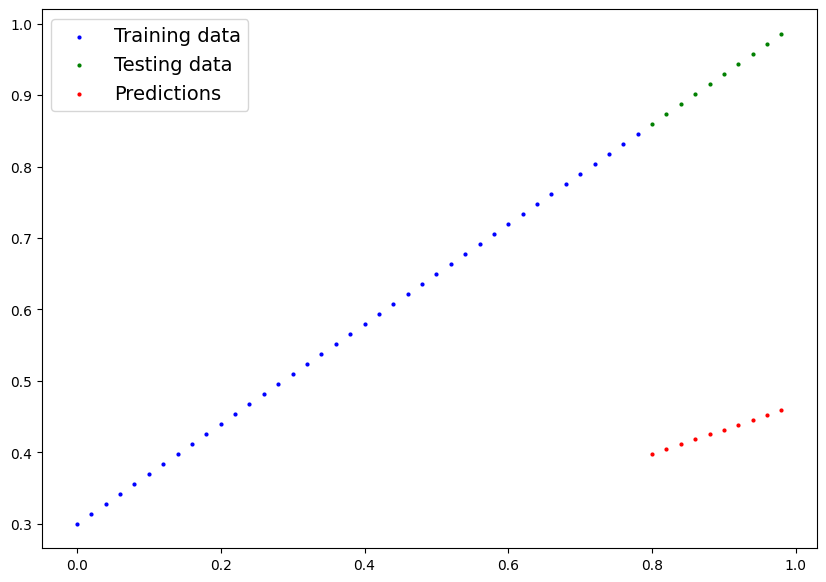

In [266]:
plot_predictions(predictions = y_preds)

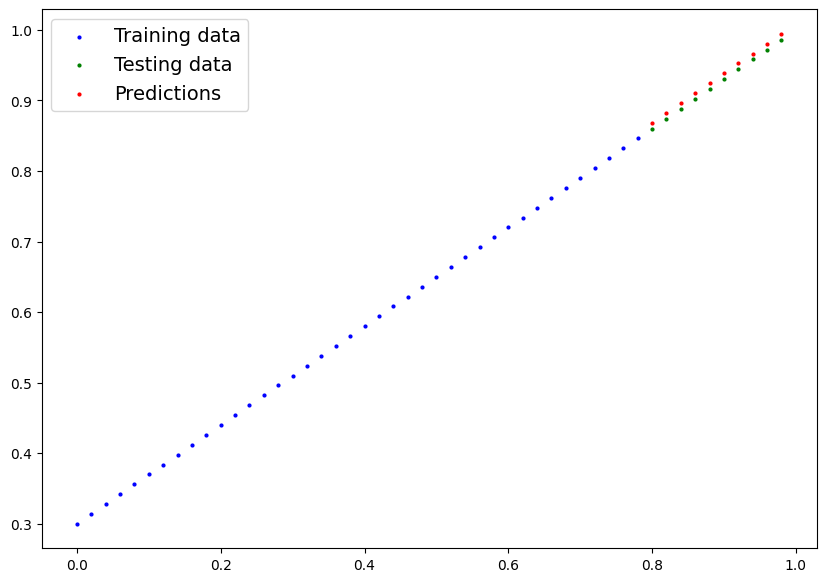

In [267]:
plot_predictions(predictions = y_preds_new)

In [268]:
import numpy as np

#plot the loss curve


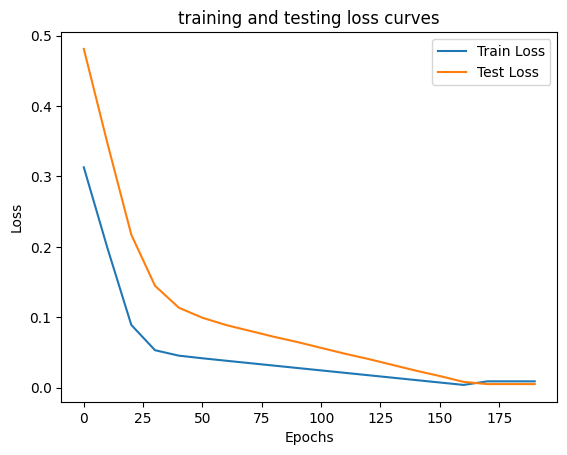

In [269]:
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label = "Train Loss")
plt.plot(epoch_count , test_loss_values , label = "Test Loss")
plt.title("training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()